<a href="https://colab.research.google.com/github/Ojasav-Rathore/DeepLearningLab/blob/main/DL_LAB3_25AFI13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.random.randn(200, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int).reshape(-1, 1)

lr = 0.1
epochs = 1000
W = np.random.randn(2, 1)
b = np.zeros((1, 1))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for _ in range(epochs):
    z = np.dot(X, W) + b
    y_pred = sigmoid(z)

    dW = np.dot(X.T, (y_pred - y)) / len(X)
    db = np.mean(y_pred - y)

    W -= lr * dW
    b -= lr * db

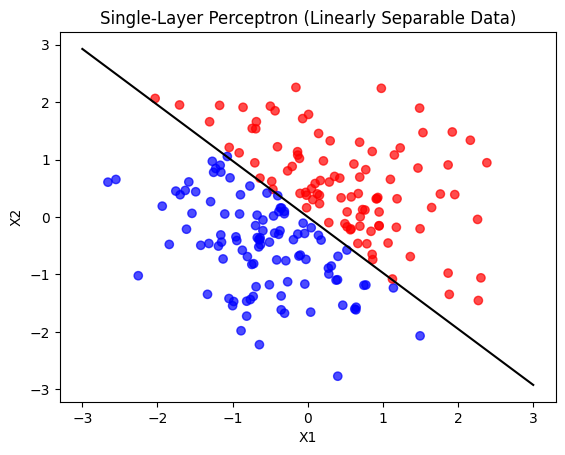

In [2]:
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='bwr', alpha=0.7)

x_vals = np.linspace(-3, 3, 100)
y_vals = -(W[0] * x_vals + b) / W[1]
plt.plot(x_vals, y_vals.flatten(), 'k')

plt.title("Single-Layer Perceptron (Linearly Separable Data)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


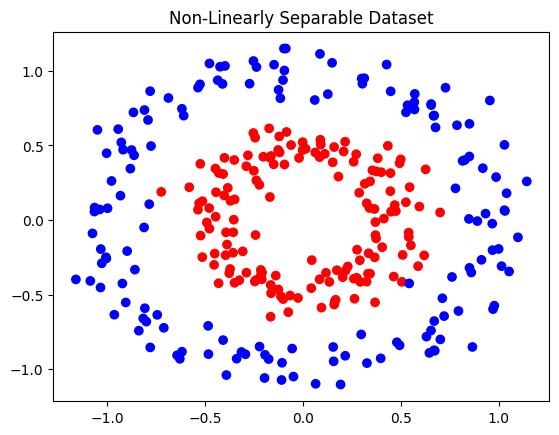

In [3]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=300, noise=0.1, factor=0.5)
y = y.reshape(-1, 1)

plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='bwr')
plt.title("Non-Linearly Separable Dataset")
plt.show()

In [4]:
input_size = 2
hidden_size = 8
output_size = 1

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

lr = 0.1
epochs = 5000

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z)**2

for _ in range(epochs):

    z1 = np.dot(X, W1) + b1
    a1 = tanh(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = sigmoid(z2)

    dz2 = y_pred - y
    dW2 = np.dot(a1.T, dz2)
    db2 = np.mean(dz2, axis=0)

    dz1 = np.dot(dz2, W2.T) * tanh_derivative(z1)
    dW1 = np.dot(X.T, dz1)
    db1 = np.mean(dz1, axis=0)

    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1


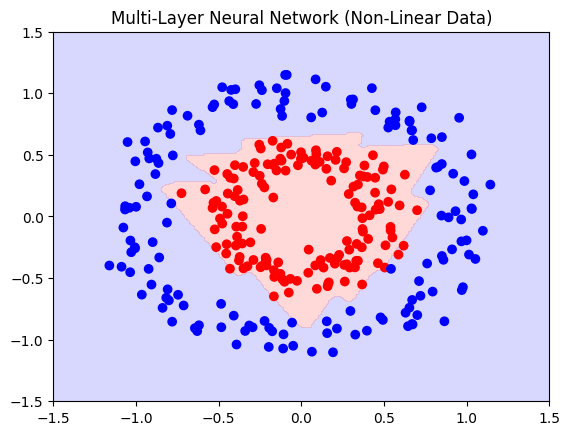

In [5]:
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 200),
                     np.linspace(-1.5, 1.5, 200))

grid = np.c_[xx.ravel(), yy.ravel()]
z1 = tanh(np.dot(grid, W1) + b1)
z2 = sigmoid(np.dot(z1, W2) + b2)
Z = z2.reshape(xx.shape)

plt.contourf(xx, yy, Z > 0.5, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='bwr')
plt.title("Multi-Layer Neural Network (Non-Linear Data)")
plt.show()
